# Introduction / Used Cars Prices
Hi, My name is Asaad and I wanted to learn machine learning and I browsed the Internet until I found a really strait forward course at elitedatascience.com. My initial goal was to learn audio classification and digital signal processing. I took their advice ("To the stars") and head to learn deep learning and digital signal processing. I just finished learning and started a project related to audios and signals. I gained huge clarity for machine learning from taking the course that helped me start learning advanced topics. I visited back this course and I forgot about the certificate. So I build this small notebook to predict used car prices from a German dataset from Kaggle.

https://www.kaggle.com/orgesleka/used-cars-database

## Library Imports 

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 250)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np

from matplotlib import  pyplot as plt 
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.exceptions import NotFittedError

import pickle 
import os

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=ConvergenceWarning)

## Exploratory Analysis

I am using CoLab, importing and exporting datasets into google drive

In [3]:
DATASET_PATH = 'drive/My\ Drive/Projects/MLProjects/Used\ Cars/Datasets/'


In [4]:
!cp {DATASET_PATH + 'autos.xlsx'} .

In [5]:
df = pd.read_excel('autos.xlsx')

In [6]:
df.shape

(371539, 20)

In [7]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
5313,2016-03-27 13:55:01,Ford_escord_showcar,privat,Angebot,1600.000,test,kleinwagen,1996.000,NaN,0.000,escort,60000,0.000,benzin,ford,NaN,2016-03-27,0.000,93491.000,2016-04-01 13:17:55
282451,2016-04-02 17:55:59,Peugeot_206_1Hand,privat,Angebot,2200.000,control,kleinwagen,2002.000,manuell,60.000,2_reihe,125000,7.000,benzin,peugeot,NaN,2016-04-02,0.000,63546.000,2016-04-06 17:18:05
260942,2016-03-29 19:54:31,Opel_Diplomat_b_zu_verkaufen__auch_Tausch_gege...,privat,Angebot,0.000,control,limousine,1976.000,automatik,145.000,andere,150000,0.000,benzin,opel,nein,2016-03-29,0.000,66663.000,2016-04-06 06:15:52
157664,2016-03-30 18:48:24,Ford_Galaxy__Benzin_Tuev_07.2016,privat,Angebot,1450.000,test,NaN,2016.000,automatik,0.000,NaN,150000,7.000,benzin,ford,NaN,2016-03-30,0.000,26789.000,2016-04-01 13:44:55
158562,2016-03-21 10:56:15,BMW_118i_5_Tuerer_SportLine_Xenon_Navi_Prof_Hi...,privat,Angebot,19500.000,test,limousine,2012.000,manuell,170.000,1er,60000,10.000,benzin,bmw,nein,2016-03-21,0.000,27721.000,2016-04-06 04:16:41
289191,2016-03-20 15:36:19,verkaufe_opa`s_auto.,privat,Angebot,1000.000,control,limousine,1998.000,manuell,77.000,andere,100000,0.000,NaN,rover,nein,2016-03-20,0.000,89250.000,2016-03-30 06:16:00
35653,2016-03-23 10:51:24,VW_Passat_3B_Variant_1_9TDI_Pumpe_Duese_LC7V,privat,Angebot,800.000,control,kombi,1999.000,manuell,116.000,passat,150000,0.000,diesel,volkswagen,ja,2016-03-23,0.000,34439.000,2016-03-26 02:48:07
33229,2016-03-14 12:47:30,Ford_Focus_Coupe_/_Cabrio,privat,Angebot,7950.000,test,cabrio,2007.000,manuell,136.000,focus,150000,4.000,diesel,ford,nein,2016-03-14,0.000,27570.000,2016-03-24 20:18:02
213004,2016-03-22 15:41:33,VW_Golf_4_TDI_Sport_Edition,privat,Angebot,4000.000,control,kleinwagen,2002.000,manuell,131.000,NaN,150000,4.000,diesel,volkswagen,nein,2016-03-22,0.000,94545.000,2016-04-06 05:15:34
163084,2016-03-25 14:57:52,Opel_Corsa_1.2_16V,privat,Angebot,1190.000,control,kleinwagen,2002.000,manuell,75.000,corsa,150000,2.000,benzin,opel,nein,2016-03-25,0.000,24211.000,2016-04-06 18:18:49


I will drop brands that do not have that many cars (less than 1000)

In [25]:
df = df.groupby('brand').filter(lambda x : len(x)>1000)

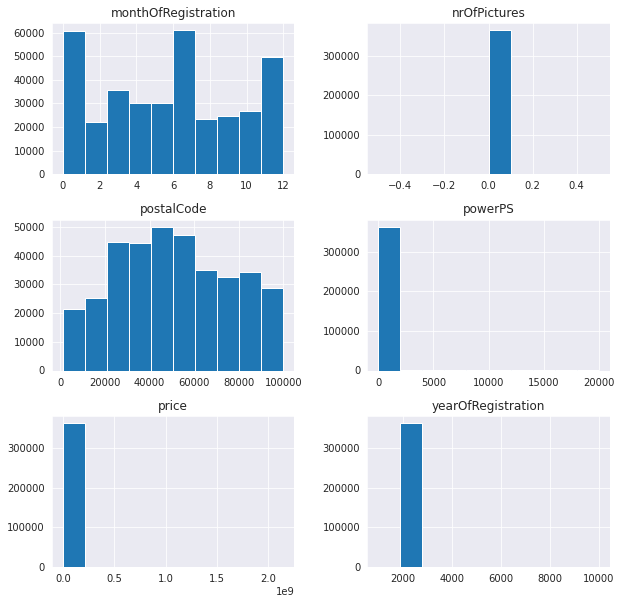

In [26]:
df.hist(figsize=(10,10))
plt.show()

In [27]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,363991.00,363991.00,363991.00,363991.00,363991.00,363991.00
mean,17492.14,2004.62,115.65,5.74,0.00,50854.56
std,3624862.85,92.79,193.72,3.71,0.00,25765.87
min,0.00,1000.00,0.00,0.00,0.00,1067.00
25%,1150.00,1999.00,70.00,3.00,0.00,30539.00
50%,2950.00,2003.00,105.00,6.00,0.00,49624.00
75%,7200.00,2008.00,150.00,9.00,0.00,71549.00
max,2147483647.00,9999.00,20000.00,12.00,0.00,99998.00


In [28]:
df.describe(include=['object'])

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,kilometer,fuelType,brand,notRepairedDamage
count,363991,363977,363991,363991,363991,326908,344331,343946,363991,331489,363991,293491
unique,276486,228033,2,2,2,8,2,207,13,7,28,2
top,2016-03-19 21:49:56,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,150000,benzin,volkswagen,nein
freq,6,657,363988,363980,188674,94217,269060,30070,236980,219076,79640,258096


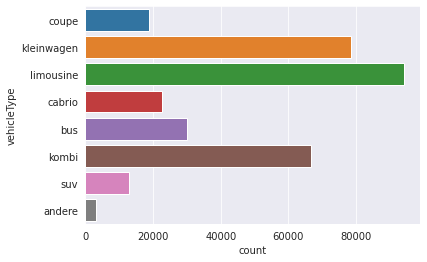

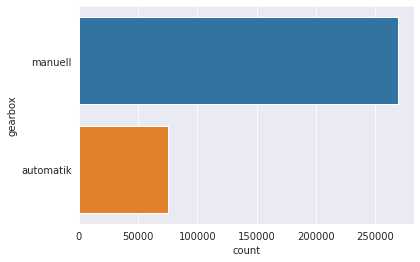

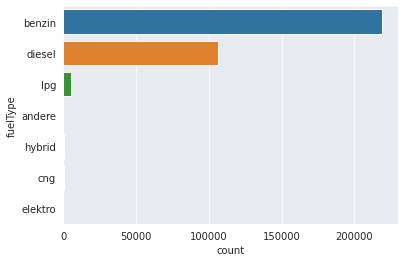

In [30]:
for feature in ['vehicleType','gearbox', 'fuelType']:
    sns.countplot(y=feature, data=df)
    plt.show()

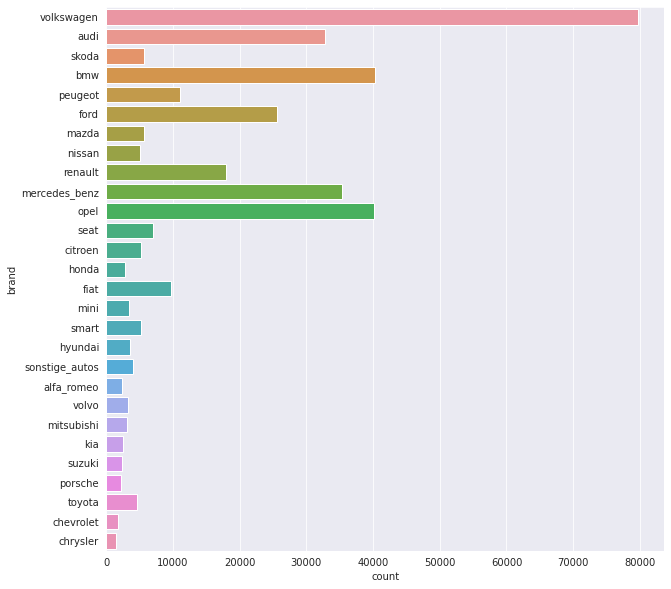

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(y='brand', data=df)
plt.show()

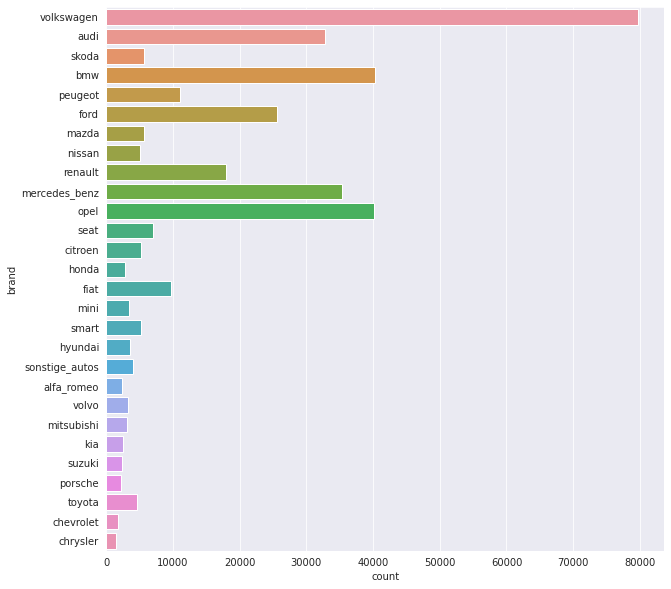

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(y='brand', data=df)
plt.show()

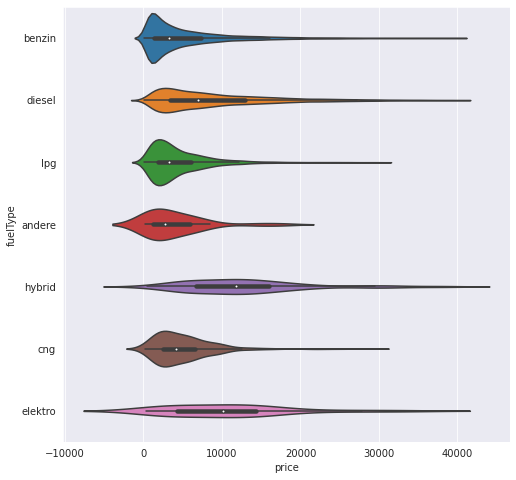

In [63]:
plt.figure(figsize=(8,8))
sns.violinplot(y='fuelType', x='price', data=df)
plt.show()

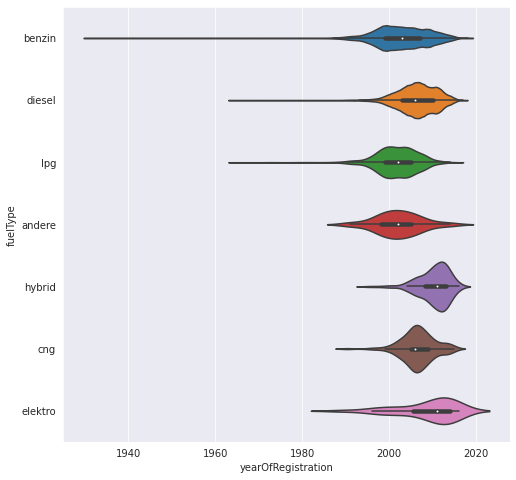

In [64]:
plt.figure(figsize=(8,8))
sns.violinplot(y='fuelType', x='yearOfRegistration', data=df)
plt.show()

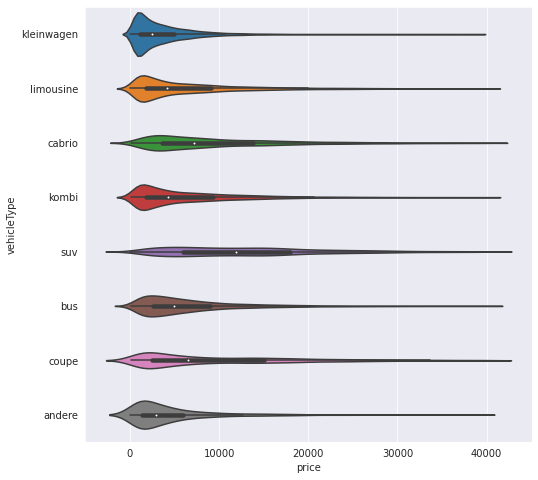

In [65]:
plt.figure(figsize=(8,8))
sns.violinplot(y='vehicleType', x='price', data=df)
plt.show()

In [36]:
df.groupby('notRepairedDamage').mean()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
notRepairedDamage,,,,,,
ja,67233.12,2001.68,103.24,5.34,0.00,50481.50
nein,9148.58,2004.12,125.39,6.14,0.00,51522.20


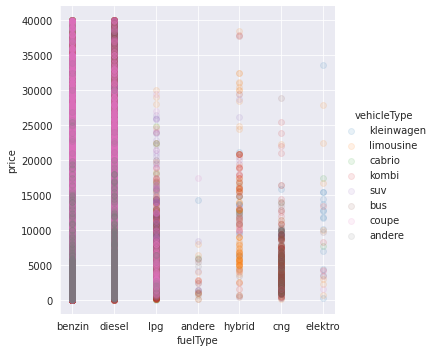

In [69]:
sns.lmplot(x='fuelType',
           y='price',
           hue='vehicleType',
           data=df,
           fit_reg=False,
           scatter_kws={'alpha':0.1})
plt.show()

In [38]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480.00,test,NaN,1993.00,manuell,0.00,golf,150000,0.00,benzin,volkswagen,NaN,2016-03-24,0.00,70435.00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300.00,test,coupe,2011.00,manuell,190.00,NaN,125000,5.00,diesel,audi,ja,2016-03-24,0.00,66954.00,2016-04-07 01:46:50
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.00,test,kleinwagen,2001.00,manuell,75.00,golf,150000,6.00,benzin,volkswagen,nein,2016-03-17,0.00,91074.00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.00,test,kleinwagen,2008.00,manuell,69.00,fabia,90000,7.00,diesel,skoda,nein,2016-03-31,0.00,60437.00,2016-04-06 10:17:21
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.00,test,limousine,1995.00,manuell,102.00,3er,150000,10.00,benzin,bmw,ja,2016-04-04,0.00,33775.00,2016-04-06 19:17:07


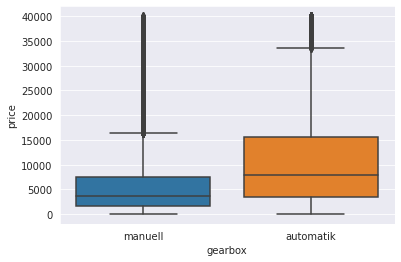

In [70]:
sns.boxplot(y='price', x='gearbox', data=df)
plt.show()

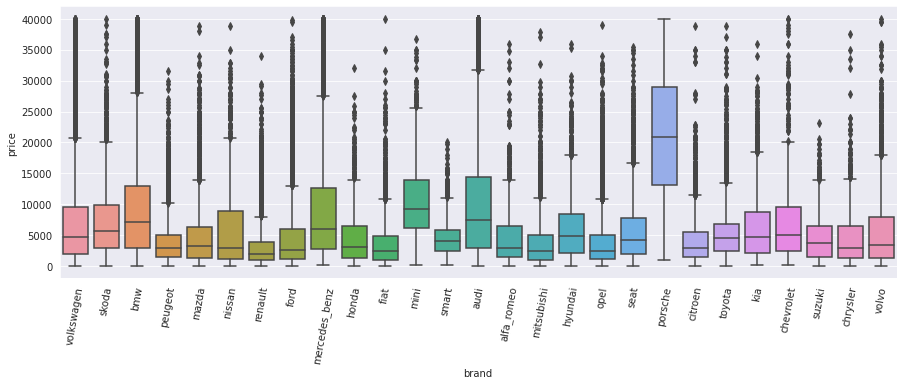

In [71]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=80)
sns.boxplot(y='price', x='brand', data=df)
plt.show()

In [41]:
df.isnull().sum()

dateCrawled                0
name                      14
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37083
yearOfRegistration         0
gearbox                19660
powerPS                    0
model                  20045
kilometer                  0
monthOfRegistration        0
fuelType               32502
brand                      0
notRepairedDamage      70500
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [42]:
df.powerPS.min()

0.0

## Data Cleaning

In [43]:
df.isnull().sum()

dateCrawled                0
name                      14
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37083
yearOfRegistration         0
gearbox                19660
powerPS                    0
model                  20045
kilometer                  0
monthOfRegistration        0
fuelType               32502
brand                      0
notRepairedDamage      70500
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [44]:
df.drop(columns=['name','dateCrawled', 'seller', 'offerType',
                 'abtest', 'dateCreated', 'nrOfPictures',
                 'postalCode', 'lastSeen','monthOfRegistration' ], inplace = True)

In [45]:
df.dropna(inplace=True)

In [46]:
df.shape

(255736, 10)

In [47]:
df.isnull().sum()

price                 0
vehicleType           0
yearOfRegistration    0
gearbox               0
powerPS               0
model                 0
kilometer             0
fuelType              0
brand                 0
notRepairedDamage     0
dtype: int64

In [49]:
df.sample(10)

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
291989,3090.00,limousine,2002.00,manuell,105.00,golf,150000,benzin,volkswagen,nein
314437,1300.00,limousine,1994.00,manuell,136.00,e_klasse,150000,benzin,mercedes_benz,ja
367559,6800.00,limousine,2004.00,automatik,224.00,a6,150000,diesel,audi,nein
172720,1000.00,limousine,1995.00,manuell,116.00,3er,150000,benzin,bmw,nein
352512,29900.00,suv,2014.00,automatik,177.00,q3,40000,diesel,audi,nein
75507,3799.00,kombi,2006.00,manuell,140.00,passat,150000,diesel,volkswagen,nein
114462,13500.00,coupe,2008.00,manuell,160.00,tt,100000,benzin,audi,nein
210218,17900.00,limousine,2007.00,manuell,177.00,x_reihe,100000,diesel,bmw,nein
327657,21999.00,limousine,2012.00,manuell,184.00,1er,40000,diesel,bmw,nein
153487,2200.00,limousine,2000.00,manuell,114.00,primera,100000,benzin,nissan,nein


In [50]:
df.notRepairedDamage.unique()

array(['nein', 'ja'], dtype=object)

converting true and false to 1 and 0

In [51]:
df.notRepairedDamage.replace(['nein', 'ja'], [0, 1], inplace=True)

In [52]:
df.dtypes

price                 float64
vehicleType            object
yearOfRegistration    float64
gearbox                object
powerPS               float64
model                  object
kilometer              object
fuelType               object
brand                  object
notRepairedDamage       int64
dtype: object

Converting to integer

In [53]:
df.yearOfRegistration = df.yearOfRegistration.astype(int)
df.kilometer = df.kilometer.astype(int)

In [ ]:
df.fuelType.unique()

In [55]:
df.gearbox.unique()

array(['manuell', 'automatik'], dtype=object)

In [56]:
print(len(df[df.price > 100000]))
print(len(df[df.price < 50]))

216
3701


Dropping observations that maybe not true

In [57]:
df = df[(df.price > 50) & (df.price < 40000)]

In [58]:
df = df[df.powerPS > 50]

In [59]:
df.drop_duplicates(inplace = True)

In [60]:
df.shape

(200861, 10)

In [61]:
df.head()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
3,1500.00,kleinwagen,2001,manuell,75.00,golf,150000,benzin,volkswagen,0
4,3600.00,kleinwagen,2008,manuell,69.00,fabia,90000,diesel,skoda,0
5,650.00,limousine,1995,manuell,102.00,3er,150000,benzin,bmw,1
6,2200.00,cabrio,2004,manuell,109.00,2_reihe,150000,benzin,peugeot,0
10,2000.00,limousine,2004,manuell,105.00,3_reihe,150000,benzin,mazda,0


## Feature Engineering

I wanted to create more features but it uses the same parameters so I only used one.

In [72]:
# def car_value(row):
#   value = 5
#   if row['kilometer'] > 120000:
#     value -= 1
#   if row['yearOfRegistration'] < 2010:
#     value -= 1
#   if row['notRepairedDamage'] == 1:
#     value -= 1
#   if row['price'] > 20000:
#     value -= 1

#   return value


def car_shape(row):
  value = 4
  if row['kilometer'] > 120000:
    value -= 1
  if row['yearOfRegistration'] < 2000:
    value -= 1
  if row['notRepairedDamage'] == 1:
    value -= 1

  return value

# def car_safety(row):
#   value = 4
#   if row['kilometer'] > 140000:
#     value -= 1
#   if row['yearOfRegistration'] < 2000:
#     value -= 1
#   if row['notRepairedDamage'] == 1:
#     value -= 1

#   return value

# def car_performance(row):
#   value = 4
#   if row['kilometer'] > 140000:
#     value -= 1
#   if row['powerPS'] < 2000:
#     value -= 1
#   if row['notRepairedDamage'] == 1:
#     value -= 1


#   return value

In [73]:
df['carShape'] = df.apply(car_shape, axis=1)

In [74]:
df.dtypes

price                 float64
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS               float64
model                  object
kilometer               int64
fuelType               object
brand                  object
notRepairedDamage       int64
carShape                int64
dtype: object

### Creating ABT 

In [75]:
df_ABT = pd.get_dummies(df, columns=['vehicleType', 'gearbox', 'model', 'fuelType', 'brand'])

In [76]:
df_ABT.head(10)

,price,yearOfRegistration,powerPS,kilometer,notRepairedDamage,carShape,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_automatik,gearbox_manuell,model_80,model_90,model_100,model_145,model_147,model_156,model_159,model_200,model_500,model_850,model_911,model_1_reihe,model_1er,model_2_reihe,model_300c,model_3_reihe,model_3er,model_4_reihe,model_5_reihe,model_5er,model_6_reihe,model_6er,model_7er,model_a1,model_a2,model_a3,model_a4,model_a5,model_a6,model_a8,model_a_klasse,model_accord,model_agila,model_alhambra,model_almera,model_altea,model_amarok,model_andere,model_antara,model_arosa,model_astra,model_auris,model_avensis,model_aveo,model_aygo,model_b_klasse,model_b_max,model_beetle,model_berlingo,model_bora,model_boxster,model_bravo,model_c1,model_c2,model_c3,model_c4,model_c5,model_c_klasse,model_c_max,model_c_reihe,model_caddy,model_calibra,model_captiva,model_carisma,model_carnival,model_cayenne,model_cc,model_ceed,model_citigo,model_civic,model_cl,model_clio,model_clk,model_clubman,model_colt,model_combo,model_cooper,model_cordoba,model_corolla,model_corsa,model_cr_reihe,model_croma,model_crossfire,model_cx_reihe,model_doblo,model_ducato,model_e_klasse,model_eos,model_escort,model_espace,model_exeo,model_fabia,model_fiesta,model_focus,model_forfour,model_fortwo,model_fox,model_fusion,model_g_klasse,model_galant,model_galaxy,model_getz,model_gl,model_glk,model_golf,model_grand,model_i3,model_i_reihe,model_ibiza,...,model_kaefer,model_kangoo,model_kuga,model_laguna,model_lancer,model_leon,model_lupo,model_m_klasse,model_m_reihe,model_matiz,model_megane,model_meriva,model_micra,model_mii,model_modus,model_mondeo,model_mustang,model_mx_reihe,model_navara,model_note,model_octavia,model_omega,model_one,model_outlander,model_pajero,model_panda,model_passat,model_phaeton,model_picanto,model_polo,model_primera,model_ptcruiser,model_punto,model_q3,model_q5,model_q7,model_qashqai,model_r19,model_rav,model_rio,model_roadster,model_roomster,model_rx_reihe,model_s60,model_s_klasse,model_s_max,model_santa,model_scenic,model_scirocco,model_seicento,model_sharan,model_signum,model_sl,model_slk,model_sorento,model_spark,model_spider,model_sportage,model_sprinter,model_stilo,model_superb,model_swift,model_tigra,model_tiguan,model_toledo,model_touareg,model_touran,model_transit,model_transporter,model_tt,model_tucson,model_twingo,model_up,model_v40,model_v50,model_v60,model_v70,model_v_klasse,model_vectra,model_verso,model_viano,model_vito,model_vivaro,model_voyager,model_x_reihe,model_x_trail,model_xc_reihe,model_yaris,model_yeti,model_z_reihe,model_zafira,fuelType_andere,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_fiat,brand_ford,brand_honda,brand_hyundai,brand_kia,brand_mazda,brand_mercedes_benz,brand_mini,brand_mitsubishi,brand_nissan,brand_opel,brand_peugeot,brand_porsche,brand_renault,brand_seat,brand_skoda,brand_smart,brand_suzuki,brand_toyota,brand_volkswagen,brand_volvo
3,1500.00,2001,75.00,150000,0,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3600.00,2008,69.00,90000,0,4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

saving ABT

In [77]:
df_ABT.to_csv('analytical_base_table.csv', index=None)
!cp analytical_base_table.csv {DATASET_PATH + 'analytical_base_table.csv'}

## Algorithm Selection

### Regression Algorithms

In [78]:
!cp {DATASET_PATH + 'analytical_base_table.csv'} .
df_ABT = pd.read_csv('analytical_base_table.csv')
print(df.shape)

(200861, 11)


In [79]:
y = df_ABT.price

X = df_ABT.drop('price', axis= 1)

In [80]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=123)

In [81]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123))
}

# Add a pipeline for Elastic-Net
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

In [82]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [83]:
print( '{} observations in the training set.'.format( len(X_train) ) )
print( '{} observations in the test set.'.format( len(X_test) ) )

160688 observations in the training set.
40173 observations in the test set.


In [84]:
print( pipelines['ridge'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=123,
                       solver='auto', tol=0.001))],
         verbose=False)


In [85]:
print( enet_hyperparameters['elasticnet__l1_ratio'] )

[0.1, 0.3, 0.5, 0.7, 0.9]


### Sklearn's Standard Scaler

In [86]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
print( 'Mean:', scaler.mean_[0] )
print( 'Standard Deviation:', scaler.scale_[0] )

Mean: 2003.793662252315
Standard Deviation: 6.2025690363620605


In [88]:
X_test_new = scaler.transform(X_test)

In [89]:
print( type(X_test_new) )
print( X_test_new.shape )

<class 'numpy.ndarray'>
(40173, 256)


In [90]:
print( X_test_new[:5,0] )

[ 0.67816057 -1.57896868  1.64550168  0.35571353  1.0006076 ]


### Tree Pipelines


In [91]:
# # Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),
                                GradientBoostingRegressor(random_state=123))

In [92]:
print( pipelines['rf'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)


In [93]:
print( type( pipelines['rf'] ) )

<class 'sklearn.pipeline.Pipeline'>


In [94]:
for key, value in pipelines.items():
    print( key, type(value) )


lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


### Hyperparameter Grids

In [95]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

In [96]:
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [97]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [98]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


## Model Training

I am going to use 100000 only, because it is taking for ever to finish. Whatt I did first I used 10000 and found out that GB is working best then I did it again with 100000 but only for GB and it took soo much time.

In [130]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train[:100000], y_train[:100000])
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model


print('All have been fitted.')



All have been fitted.


In [131]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
    except NotFittedError as e:
        print(repr(e))

print('Done.')

Done.


In [132]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )


lasso 0.6992974897243245
ridge 0.6931791201715616
enet 0.6992667754603096
rf 0.8409460659401923
gb 0.8492911673202765


In [135]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    

lasso
--------
R^2: -0.05878052134872602
MAE: 2506.395824438091
ridge
--------
R^2: -0.05303089817221229
MAE: 2513.337174347988
enet
--------
R^2: 0.1489422470641062
MAE: 2531.403509457355
rf
--------
R^2: 0.849724206051105
MAE: 1551.530352355823
gb
--------
R^2: 0.8594884373317173
MAE: 1483.4998505384863


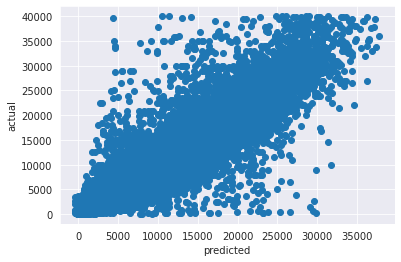

In [136]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

### Saving Model


In [137]:
type(fitted_models['gb'])

sklearn.model_selection._search.GridSearchCV

In [138]:
type(fitted_models['gb'].best_estimator_)

sklearn.pipeline.Pipeline

In [139]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=5, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=200,
                                           n_iter_no_change=N

In [140]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)
    !cp final_model.pkl {DATASET_PATH}

## Insights & Analysis

GB was working best for this project. Some of the remaining records in the training may not best use them for accuracy. Not all brands/models have been trained. But for example (VW or BMW) it is really good but not for all models.

In [141]:
!cp {DATASET_PATH + 'final_model.pkl'} . 

In [142]:
with open('final_model.pkl', 'rb') as f:
  clf = pickle.load(f)

In [143]:
print(clf)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=5, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=200,
                                           n_iter_no_change=N

In [144]:
def print_list(list):
  for index, val in enumerate(list):
    print('({}) {}'.format(index+1, val))


I am going to use some of the data from the training set from the end because I only used the first 100000 for the training.

In [145]:
df.tail()

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,carShape
371523,5000.00,limousine,2003,automatik,260.00,e_klasse,150000,diesel,mercedes_benz,1,2
371531,3200.00,limousine,2004,manuell,225.00,leon,150000,benzin,seat,1,2
371535,1199.00,cabrio,2000,automatik,101.00,fortwo,125000,benzin,smart,0,3
371536,9200.00,bus,1996,manuell,102.00,transporter,150000,diesel,volkswagen,0,2
371538,28990.00,limousine,2013,manuell,320.00,m_reihe,50000,benzin,bmw,0,4


In [146]:
brands = df.brand.unique()
fuelType = df.fuelType.unique()
kilometer = 0
powerPS = 0
gearbox = df.gearbox.unique()
yearOfRegistration = 2000
vehicleType = df.vehicleType.unique()

In [147]:
print("Please select car brand: ")
print_list(brands)
print()
selected_brand = brands[int(input())-1]

Please select car brand: 
(1) volkswagen
(2) skoda
(3) bmw
(4) peugeot
(5) mazda
(6) nissan
(7) renault
(8) ford
(9) mercedes_benz
(10) honda
(11) fiat
(12) mini
(13) smart
(14) audi
(15) alfa_romeo
(16) mitsubishi
(17) hyundai
(18) opel
(19) seat
(20) porsche
(21) citroen
(22) toyota
(23) kia
(24) chevrolet
(25) suzuki
(26) chrysler
(27) volvo

9


In [148]:
print("Please select car model: ")
models = df.model[df.brand == selected_brand].unique()
print_list(models)
print()
selected_model = models[int(input())-1]

Please select car model: 
(1) a_klasse
(2) andere
(3) e_klasse
(4) b_klasse
(5) c_klasse
(6) vito
(7) sprinter
(8) slk
(9) m_klasse
(10) viano
(11) s_klasse
(12) sl
(13) glk
(14) clk
(15) v_klasse
(16) cl
(17) g_klasse
(18) gl

3


In [149]:
print("Please select vehicle Type: ")
print_list(vehicleType)
print()
selected_vehicleType = vehicleType[int(input())-1]

Please select vehicle Type: 
(1) kleinwagen
(2) limousine
(3) cabrio
(4) kombi
(5) suv
(6) bus
(7) coupe
(8) andere

2


In [150]:
print("Please select car gearbox: ")
print_list(gearbox)
print()
selected_gearbox = gearbox[int(input())-1]

Please select car gearbox: 
(1) manuell
(2) automatik

2


In [151]:
print("Please select car fuel type: ")
print_list(fuelType)
print()
selected_fuelType = fuelType[int(input())-1]

Please select car fuel type: 
(1) benzin
(2) diesel
(3) lpg
(4) andere
(5) hybrid
(6) cng
(7) elektro

2


In [152]:
print("Please enter car's kilometers: ")
print()
car_kilometers = int(input())

Please enter car's kilometers: 

150000


In [153]:
print("Please enter car's powerPS: ")
print()
car_powerPS = int(input())

Please enter car's powerPS: 

260


In [154]:
print("Please enter car's year Of Registration: ")
print()
car_yearOfRegistration = int(input())

Please enter car's year Of Registration: 

2003


In [155]:
print("Fully repaired from damages?: ")
print_list(['Yes', 'No'])
print()
car_notRepairedDamage = int(input()) - 1

Fully repaired from damages?: 
(1) Yes
(2) No

2


In [156]:
new_car = pd.DataFrame(columns=[df_ABT.columns.values.tolist()[1:]])
new_car.append(pd.Series(), ignore_index=True)
new_car.loc[0] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [157]:
def car_shape(kilometer, yearOfRegistration, notRepairedDamage):
  value = 4
  if kilometer > 120000:
    value -= 1
  if yearOfRegistration < 2000:
    value -= 1
  if notRepairedDamage == 1:
    value -= 1

  return value

In [158]:
new_car[['brand_{}'.format(selected_brand)]] = 1
new_car[['model_{}'.format(selected_model)]] = 1
new_car[['vehicleType_{}'.format(selected_vehicleType)]] = 1
new_car[['gearbox_{}'.format(selected_gearbox)]] = 1
new_car[['fuelType_{}'.format(selected_fuelType)]] = 1
new_car[['kilometer']] = car_kilometers
new_car[['powerPS']] = car_powerPS
new_car[['yearOfRegistration']] = car_yearOfRegistration
new_car[['notRepairedDamage']] = car_notRepairedDamage

new_car[['carShape']] = car_shape(car_kilometers, car_yearOfRegistration, car_notRepairedDamage)

In [159]:
pred_price = int(clf.predict(new_car)[0])
print('Car price from: {} to {}.'.format(pred_price - 150, pred_price + 1000))

Car price from: 5037 to 6187.
